# [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측
 
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 
   지니 지수는 얼마나 불확실한가(얼마나 섞여있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미 
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

# 붓꽃데이터로 살펴보기

## 데이터 불러오기

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report # 한번에 평가지표 출력
import warnings
warnings.filterwarnings("ignore")

dt_clf = DecisionTreeClassifier(random_state=156) # 지니가 디폴트
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3) #

iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state = 11)
dt_clf.fit(x_train, y_train)

pred = dt_clf.predict(x_test)

# 정확도
accuracy = accuracy_score(y_test, pred)
creport = classification_report(y_test, pred)
print(f'정확도: {accuracy}', '\n')
print(f'classfication report: ', '\n',  f'{creport}')

정확도: 0.9333333333333333 

classfication report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [22]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 시각화

### 1. 제약 없음

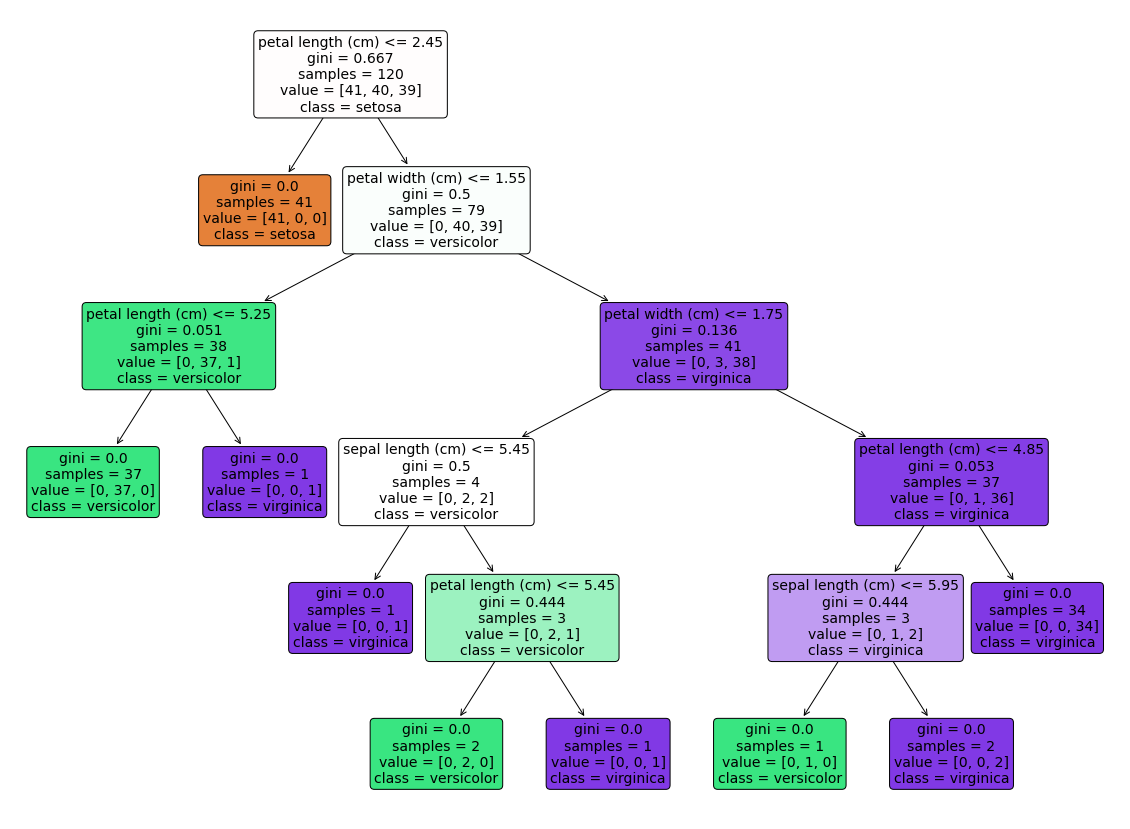

In [8]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
tree.plot_tree(dt_clf, filled = True,
              feature_names = iris_data.feature_names, 
              class_names = iris_data.target_names,
              rounded = True, fontsize = 14)
plt.show()
plt.close()

### 2. max depth 지정

In [94]:
dt_clf = DecisionTreeClassifier(random_state=156) # 지니가 지폴트
dt_clf = DecisionTreeClassifier(max_depth = 4, random_state = 156)
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2)
dt_clf.fit(x_train, y_train)

pred = dt_clf.predict(x_test)

# 정확도
accuracy = accuracy_score(y_test, pred)
creport = classification_report(y_test, pred)
print(f'정확도: {accuracy}', '\n')
print(f'classfication report: ', '\n',  f'{creport}')

정확도: 0.9666666666666667 

classfication report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



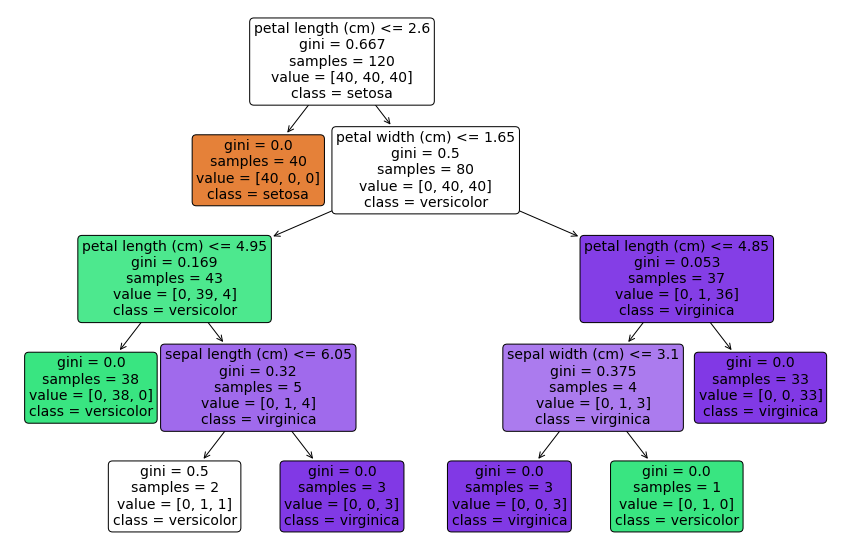

In [95]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
tree.plot_tree(dt_clf, filled = True,
              feature_names = iris_data.feature_names, 
              class_names = iris_data.target_names,
              rounded = True, fontsize = 14)
plt.show()
plt.close()

### 3. min_saples_leaf 지정

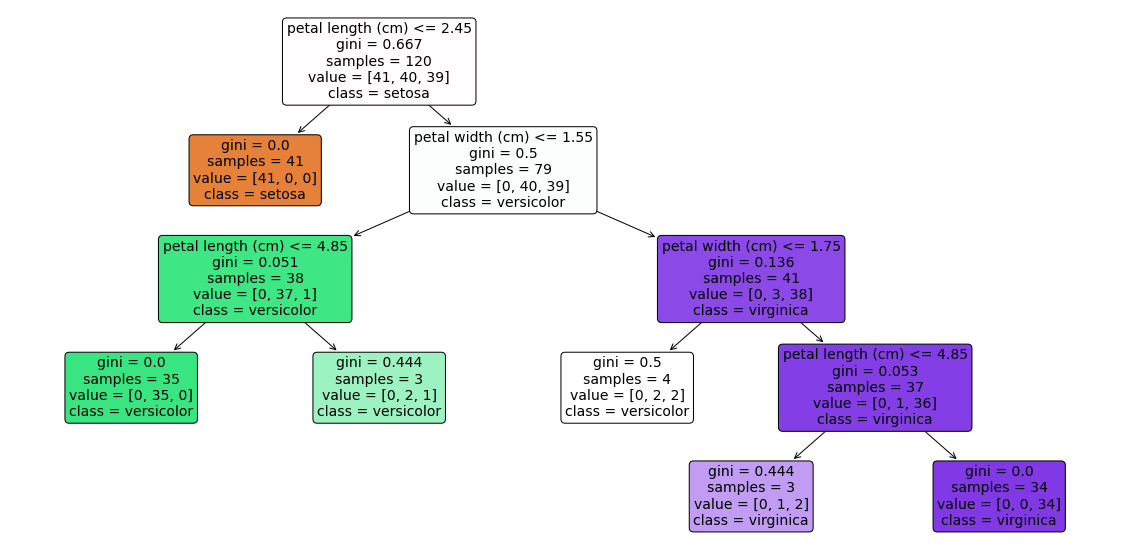

In [102]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(min_samples_leaf = 3, random_state = 156)
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state = 11)
dt_clf.fit(x_train, y_train)

plt.figure(figsize = (20,10))
tree.plot_tree(dt_clf, filled = True,
              feature_names = iris_data.feature_names, 
              class_names = iris_data.target_names,
              rounded = True, fontsize = 14)
plt.show()
plt.close()

### 4. max_leaf_nodes 지정

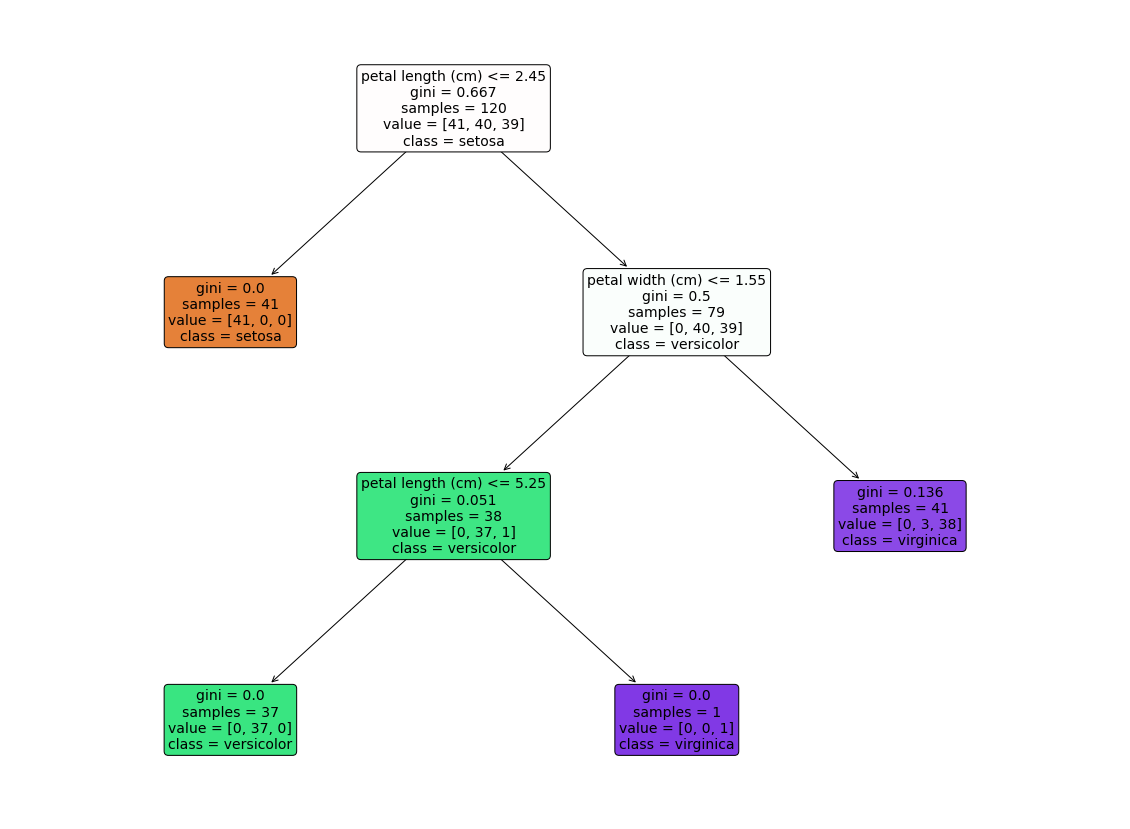

In [104]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 156)
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state = 11)
dt_clf.fit(x_train, y_train)

plt.figure(figsize = (20,15))
tree.plot_tree(dt_clf, filled = True,
              feature_names = iris_data.feature_names, 
              class_names = iris_data.target_names,
              rounded = True, fontsize = 14)
plt.show()
plt.close()

=> 지니(혼잡도)가 0일때까지 실행 / 처음엔 꽃잎이 중요기준 그다음엔 넓이가 중요기준이되어 측정됨

### 중요도 확인

feature Importances: 
 [0.    0.    0.554 0.446] 

sepal length (cm) :  0.000
sepal width (cm) :  0.000
petal length (cm) :  0.554
petal width (cm) :  0.446



<AxesSubplot:>

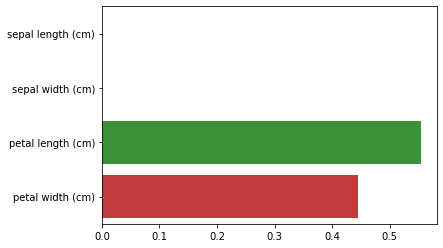

In [15]:
import seaborn as sns
import numpy as np

print(f'feature Importances: \n {np.round(dt_clf.feature_importances_, 3)}' , '\n')
for name, values in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {values : .3f}')
print()
# 수평막대그래프 출력
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

=>petal length 가 가장 피처 중요도가 높다

# 결정트리 과적합(Over fitting)

### 데이터 생성

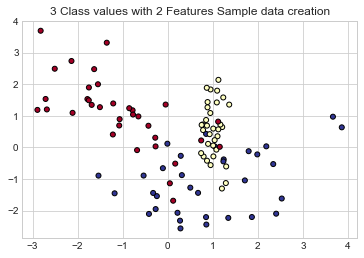

In [7]:
# 분류를 위한 테스트용 데이터를 쉽게 만들 수 있는 함수 (피처 데이터 세트와 클래스 레이블데이터 세트를 반환)
from sklearn.datasets import make_classification 
import matplotlib.pyplot as plt
%matplotlib inline

# 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들기
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                          n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 츨래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolors = 'k', cmap = plt.cm.RdYlBu)

### 결정 트리 학습

In [8]:
# Classifier의 Decision Boundary를 시각화 하는 함수 생성

import numpy as np

def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = 'rainbow', edgecolor = 'k',
              clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200), np.linspace(ylim_start, ylim_end, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용해 class boundary를 visualizatino 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                          levels = np.arange(n_classes + 1) - 0.5,
                          cmap = 'rainbow', clim = (y.min(), y.max()),
                          zorder = 1)

C:\Users\K\AppData\Local\Temp\ipykernel_5136\2161261728.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,


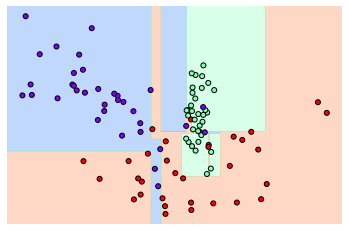

In [10]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

-> 일부 이상치 데이터까지 분류하기위해 분할이 자주 일어나 결정 기준 경계가 매우 많아졌음.
- 결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야하는 엄격한 분할 기준으로 인해 결정기준 경계가 많아지고 복잡해짐. 
- 이렇게 복잡한 모델은 학습데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 됨

### 하이퍼 파라미터 조정

C:\Users\K\AppData\Local\Temp\ipykernel_5136\2161261728.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,


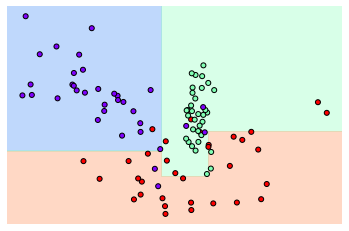

In [12]:
# min_samples+leaf : 트리 생성조건을 제약

dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

-> 이상치에 민감하게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됨
- 첫번째 모델보다 더 뛰어날 가능성이 높음 (과적합 방지)

## 결정 트리 실습 - Human Activity Recognition

#### 'dataset/human_activity' 폴더의 데이터들을 불러와서 다음을 수행
- 학습용 평가용 데이터셋 추출
- dt로 분류모델 생성 및 정확도 평가
- 하이퍼 파라미터로  'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 중요 특성 시각화

## 데이터 불러오기

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

feature_name_df = pd.read_csv('human_activity/features.txt', sep ='\s+', header=None, names = ['index', 'name'])
feature_name_df.head()

,index,name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


## 데이터 확인 및 정리

In [2]:
len(feature_name_df['name'].unique())

477

=> column이름의 값

In [3]:
feature_name_df['name'].value_counts()

fBodyAccJerk-bandsEnergy()-41,48    3
fBodyAcc-bandsEnergy()-57,64        3
fBodyAcc-bandsEnergy()-41,48        3
fBodyAcc-bandsEnergy()-33,40        3
fBodyAcc-bandsEnergy()-25,32        3
                                   ..
tBodyGyro-arCoeff()-Z,3             1
tBodyGyro-arCoeff()-Z,2             1
tBodyGyro-arCoeff()-Z,1             1
tBodyGyro-arCoeff()-Y,4             1
angle(Z,gravityMean)                1
Name: name, Length: 477, dtype: int64

In [4]:
# 중복된 피처명 확인
fea_df = feature_name_df.groupby('name').count()
print(fea_df[fea_df['index']>1].count())

index    42
dtype: int64


In [5]:
fea_df[fea_df['index']>1].head()

,index
name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


=> 42개의 피처명이 중복되어있음

In [6]:
# 원본 피처명에 _1 or _2 추가로 부여해 새로운 피처명을 갖는 데이터 생성

In [7]:
feature_name_df

,index,name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [8]:
df = pd.DataFrame(data = feature_name_df.groupby('name').cumcount(), columns = ['dup_cnt']) # 중복되는 요소별로 순차적으로 카운팅한 시리즈 객체 출력

In [9]:
df['dup_cnt'].value_counts()

0    477
1     42
2     42
Name: dup_cnt, dtype: int64

## 데이터 분리

In [10]:
# 최종 함수

def get_new_feature_df(old_name_df): 
    feature_dup_df = pd.DataFrame(data = old_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt']) # 중복되는 요소별로 순차적으로 카운팅한 시리즈 객체 출력
    feature_dup_df = feature_dup_df.reset_index() # 인덱스 재배열
    new_feature_df = pd.merge(old_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_df['column_name'] = new_feature_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+ '_' +str(x[1]) if x[1]>0 else x[0] , axis=1)
    new_feature_df = new_feature_df.drop(['index'], axis=1)
    return new_feature_df

In [11]:
# 학습용 피처 데이터 세트와 레이블 데이터 세트, test용 피처 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DF에 로드

def get_human_dataset():
    
    # DF형태로 데이터 불러오기
    feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+', header = None, names = ['column_index', 'column_name'])
    
    # 중복된 피처명 수정 위에서 짠 get_new_feature_df함수 사용
    new_feature_df = get_new_feature_df(feature_name_df)
    
    # 리스트 객체로 다시 변환
    feature_name = new_feature_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DF로 로딩
    X_train = pd.read_csv('human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 로딩 
    y_train = pd.read_csv('human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action']) 
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])
    
    # 로드된 학습/테스트용 DF 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [12]:
X_train.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

1. 학습용 평가용 데이터셋 추출

In [13]:
# 학습용 피처 데이터 세트 보기

print('학습 피처 데이터셋')
print(X_train.info())

학습 피처 데이터셋
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [14]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


=> 고르게 분포되어있음

## 모델 학습 및 평가

2. dt로 분류모델 생성 및 정확도 평가

In [15]:
# 예측 분류 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156) # (default값으로 설정)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)

print('결정트리 예측 정확도: ', accuracy)
# 하이퍼파라미터 추출
print('기본하이퍼 파라미터: ', dt_clf.get_params())

결정트리 예측 정확도:  0.8547675602307431
기본하이퍼 파라미터:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


## 파라미터 변경하면서 값 확인

3. 하이퍼 파라미터로 'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가

In [16]:
# GridSearchCV 활용

from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [4, 8, 12, 16 ,20]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose =1)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 수치: ',  grid_cv.best_score_)
print('최적의 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
최고 평균 정확도 수치:  0.8513444970102249
최적의 파라미터:  {'max_depth': 16}


4. 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
중요 특성 시각화

In [17]:
params = {'max_depth' : [4, 8, 12, 16 ,20],
                 'min_samples_split' : [16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring = 'accuracy', cv = 5, verbose=1)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 수치: ', grid_cv.best_score_)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
최고 평균 정확도 수치:  0.8548794147162603
최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [18]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('최적의 하이퍼 파라미터 시 결정 트리 예측 정확도: ', accuracy)

최적의 하이퍼 파라미터 시 결정 트리 예측 정확도:  0.8717339667458432


## 중요도 확인

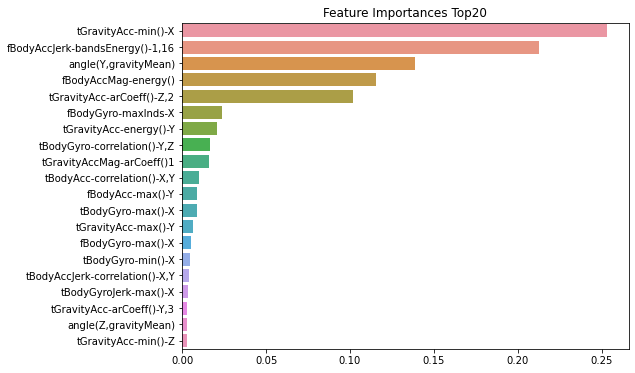

In [20]:
# 각 피처의 중요도 
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_ # feature_importances (중요한 만큼 값 설정됨)

# 각 피처 값들에 중요도 값 매칭
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도수치가 큰 값순으로 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize = (8, 6))
plt.title('Feature Importances Top20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

In [21]:
ftr_top20.index[:5].tolist()

['tGravityAcc-min()-X',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'angle(Y,gravityMean)',
 'fBodyAccMag-energy()',
 'tGravityAcc-arCoeff()-Z,2']

=> 이 순서로 가장 높은 중요도를 가진 피처

In [23]:
# 상위 20개만 뽑아서 학습시켜보기

ftr_top20.index

Index(['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16',
       'angle(Y,gravityMean)', 'fBodyAccMag-energy()',
       'tGravityAcc-arCoeff()-Z,2', 'fBodyGyro-maxInds-X',
       'tGravityAcc-energy()-Y', 'tBodyGyro-correlation()-Y,Z',
       'tGravityAccMag-arCoeff()1', 'tBodyAcc-correlation()-X,Y',
       'fBodyAcc-max()-Y', 'tBodyGyro-max()-X', 'tGravityAcc-max()-Y',
       'fBodyGyro-max()-X', 'tBodyGyro-min()-X',
       'tBodyAccJerk-correlation()-X,Y', 'tBodyGyroJerk-max()-X',
       'tGravityAcc-arCoeff()-Y,3', 'angle(Z,gravityMean)',
       'tGravityAcc-min()-Z'],
      dtype='object')

In [30]:
X_train_20 = X_train[ftr_top20.index]
X_test_20 = X_test[ftr_top20.index]

# best_df_clf = grid_cv.best_estimator_
# grid_cv.fit(X_train, y_train)
# pred1 = best_df_clf.predict(X_test)
# accuracy = accuracy_score(y_test, pred1)

# 위에서 적용한 GridSearchCV에 넣어 학습
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train_20, y_train.values.reshape(-1,))
rf_pred = rf_clf_best.predict(X_test_20)
accuracy = accuracy_score(y_test, rf_pred)
accuracy

0.8666440447913132

-> 위에 지정한 값이 더 잘나옴

In [27]:
y_train.values.reshape(-1,)

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)